In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [19]:
data = pd.read_excel('df_eda_post.xlsx')

In [25]:
customer = data.copy()

In [26]:
customer = customer.drop(customer[customer['customer_id']=='C0000001'].index)
print(customer)

       norderid customer_id cpostcode    dreceieveddate  dreceieveddate_year  \
4        100007    C0005444   HP136JT  11.12.2019 00:00                 2019   
5        100008    C0001525    E149AD  11.12.2019 00:00                 2019   
6        100009    C0019221   LE115HD  12.12.2019 00:00                 2019   
7        100010    C0005806    UB12RU  12.12.2019 00:00                 2019   
11       100013    C0007803    IG38LN  13.12.2019 00:00                 2019   
...         ...         ...       ...               ...                  ...   
92239    191657    C0030121   CV108NQ   2.12.2022 00:00                 2022   
92240    191663    C0030033   TN127BX   2.12.2022 00:00                 2022   
92241    191669    C0025890   TW121AH   3.12.2022 00:00                 2022   
92243    191715    C0030109    LE16AR   3.12.2022 00:00                 2022   
92244    191735    C0030263    CV61LH   3.12.2022 00:00                 2022   

       dreceieveddate_month  dreceieved

In [29]:
customer[['norderid', 'customer_id']]

,norderid,customer_id
4,100007,C0005444
5,100008,C0001525
6,100009,C0019221
7,100010,C0005806
11,100013,C0007803
...,...,...
92239,191657,C0030121
92240,191663,C0030033
92241,191669,C0025890
92243,191715,C0030109


In [30]:
customer = customer[['norderid', 'customer_id', 'dreceieveddate', 'total', 'orderitemtitle', 'lad']]
customer

,norderid,customer_id,dreceieveddate,total,orderitemtitle,lad
4,100007,C0005444,11.12.2019 00:00,"54,9",EFES 7437 beige 160X230,Buckinghamshire
5,100008,C0001525,11.12.2019 00:00,"54,9",EFES 7437 grey 160X230,Tower Hamlets
6,100009,C0019221,12.12.2019 00:00,"49,9",LENA 301 t�rkis 120X170,Charnwood
7,100010,C0005806,12.12.2019 00:00,"49,9",CARINA 6920 Pink 120x170,Ealing
11,100013,C0007803,13.12.2019 00:00,"24,99",Shaggy 380 grau 70X250,Redbridge
...,...,...,...,...,...,...
92239,191657,C0030121,2.12.2022 00:00,"18,61",Myshaggy 380 Grey 80x150,Nuneaton and Bedworth
92240,191663,C0030033,2.12.2022 00:00,"40,5",Myshaggy 380 Grey 80x150,Tunbridge Wells
92241,191669,C0025890,3.12.2022 00:00,"22,4",Myshaggy 383 Ivory/Grey 80x150,Richmond upon Thames
92243,191715,C0030109,3.12.2022 00:00,"18,61",Myshaggy 380 Grey 80x150,Leicester


In [31]:
customer = customer.drop(customer[customer['total']==0].index)
print(customer)

       norderid customer_id    dreceieveddate  total  \
4        100007    C0005444  11.12.2019 00:00   54,9   
5        100008    C0001525  11.12.2019 00:00   54,9   
6        100009    C0019221  12.12.2019 00:00   49,9   
7        100010    C0005806  12.12.2019 00:00   49,9   
11       100013    C0007803  13.12.2019 00:00  24,99   
...         ...         ...               ...    ...   
92239    191657    C0030121   2.12.2022 00:00  18,61   
92240    191663    C0030033   2.12.2022 00:00   40,5   
92241    191669    C0025890   3.12.2022 00:00   22,4   
92243    191715    C0030109   3.12.2022 00:00  18,61   
92244    191735    C0030263   3.12.2022 00:00  21,89   

                       orderitemtitle                    lad  
4             EFES 7437 beige 160X230        Buckinghamshire  
5              EFES 7437 grey 160X230          Tower Hamlets  
6             LENA 301 t�rkis 120X170              Charnwood  
7            CARINA 6920 Pink 120x170                 Ealing  
11          

In [33]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37577 entries, 4 to 92244
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   norderid        37577 non-null  int64 
 1   customer_id     37577 non-null  object
 2   dreceieveddate  37577 non-null  object
 3   total           37577 non-null  object
 4   orderitemtitle  37577 non-null  object
 5   lad             37408 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.0+ MB


In [55]:
customer.total = customer.total.str.replace(',' , '.')

In [56]:
customer.head()

,norderid,customer_id,dreceieveddate,total,orderitemtitle,lad
4,100007,C0005444,11.12.2019 00:00,54.9,EFES 7437 beige 160X230,Buckinghamshire
5,100008,C0001525,11.12.2019 00:00,54.9,EFES 7437 grey 160X230,Tower Hamlets
6,100009,C0019221,12.12.2019 00:00,49.9,LENA 301 t�rkis 120X170,Charnwood
7,100010,C0005806,12.12.2019 00:00,49.9,CARINA 6920 Pink 120x170,Ealing
11,100013,C0007803,13.12.2019 00:00,24.99,Shaggy 380 grau 70X250,Redbridge


In [57]:
customer['total'] = customer['total'].astype(float)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


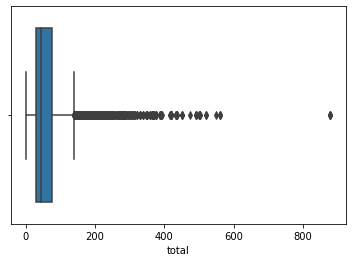

In [59]:
sns.boxplot(customer['total'])
plt.show();

In [60]:
Q1 = customer['total'].quantile(0.25)
Q3 = customer['total'].quantile(0.75)

IQR = Q3 - Q1

In [62]:
print(Q1)
print(Q3)
print(IQR)

29.9
73.94
44.04


In [63]:
lowlim = Q1 - 1.5*IQR
upplim = Q3 + 1.5*IQR

In [64]:
customer = customer[~((customer['total'] > upplim) | (customer['total'] < lowlim))]

In [65]:
print(customer.shape)

(36164, 6)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


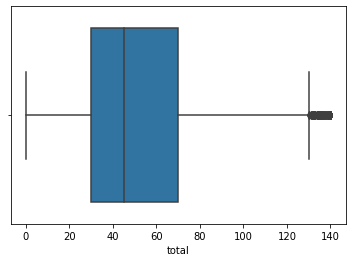

In [67]:
sns.boxplot(customer['total'])
plt.show()

In [69]:
customer.sample(7)

,norderid,customer_id,dreceieveddate,total,orderitemtitle,lad
70873,170594,C0003980,4.09.2022 00:00,52.99,Myshaggy 381 Pink 160 x 230 cm,King's Lynn and West Norfolk
3102,103109,C0027035,19.06.2020 00:00,39.99,CAIMAS 2995 120X170,Aberdeen City
87184,186569,C0006402,15.11.2022 00:00,39.99,Gustavo 1193 rose 200X290,Brent
60772,160514,C0008053,17.07.2022 00:00,63.92,Eco 200 GREY 140x200,Leeds
29553,129531,C0020984,21.11.2021 00:00,118.91,Montana 3716 CREAM 200x290,Elmbridge
16236,116375,C0019198,3.04.2021 00:00,79.90,Montana 3756 blue 160X230,Trafford
13586,113697,C0005086,10.02.2021 00:00,49.90,Soft Shaggy White 160x220,Hounslow


In [71]:
customer = customer.reset_index(drop=True)

In [77]:
customer.drop('index', inplace=True, axis=1)

In [78]:
customer.head(7)

,norderid,customer_id,dreceieveddate,total,orderitemtitle,lad
0,100007,C0005444,11.12.2019 00:00,54.90,EFES 7437 beige 160X230,Buckinghamshire
1,100008,C0001525,11.12.2019 00:00,54.90,EFES 7437 grey 160X230,Tower Hamlets
2,100009,C0019221,12.12.2019 00:00,49.90,LENA 301 t�rkis 120X170,Charnwood
3,100010,C0005806,12.12.2019 00:00,49.90,CARINA 6920 Pink 120x170,Ealing
4,100013,C0007803,13.12.2019 00:00,24.99,Shaggy 380 grau 70X250,Redbridge
5,100017,C0003274,14.12.2019 00:00,89.90,EFES 7437 grey 200X290,Rochdale
6,100019,C0011632,14.12.2019 00:00,119.90,Lena 309 Aqua 200X290,Torfaen


In [79]:
print(len(customer['customer_id'].unique()))

30957


In [80]:
print(customer['customer_id'].nunique())

30957


In [81]:
print(customer['norderid'].nunique())

34330


In [82]:
print(customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36164 entries, 0 to 36163
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   norderid        36164 non-null  int64  
 1   customer_id     36164 non-null  object 
 2   dreceieveddate  36164 non-null  object 
 3   total           36164 non-null  float64
 4   orderitemtitle  36164 non-null  object 
 5   lad             36018 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ MB
None


In [83]:
customer['dreceieveddate'] = pd.to_datetime(customer['dreceieveddate'])

In [84]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36164 entries, 0 to 36163
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   norderid        36164 non-null  int64         
 1   customer_id     36164 non-null  object        
 2   dreceieveddate  36164 non-null  datetime64[ns]
 3   total           36164 non-null  float64       
 4   orderitemtitle  36164 non-null  object        
 5   lad             36018 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.7+ MB


In [85]:
today = customer['dreceieveddate'].max()
today

Timestamp('2022-12-11 00:00:00')

In [87]:
type(today)

pandas._libs.tslibs.timestamps.Timestamp

In [88]:
today = dt.datetime(2022,12,11,0,0,0)

<IPython.core.display.Javascript object>

In [89]:
today

datetime.datetime(2022, 12, 11, 0, 0)

In [91]:
r = (today - customer.groupby('customer_id').agg({'dreceieveddate':'max'})).apply(lambda x:x.dt.days)
r

,dreceieveddate
customer_id,
C0000002,727
C0000003,935
C0000004,919
C0000005,961
C0000006,932
...,...
C0032495,104
C0032496,239
C0032497,280


In [92]:
f = customer.groupby(['customer_id','norderid']).agg({'norderid':'count'})
f

,,norderid
customer_id,norderid,
C0000002,109559,2
C0000003,101905,1
C0000004,101541,1
C0000005,101225,1
C0000006,102023,1
...,...,...
C0032496,145252,1
C0032497,152697,1
C0032498,178229,1


In [93]:
f = f.groupby('customer_id').agg({'norderid':'count'})
f

,norderid
customer_id,
C0000002,1
C0000003,1
C0000004,1
C0000005,1
C0000006,1
...,...
C0032495,1
C0032496,1
C0032497,1


In [94]:
m = customer.groupby('customer_id').agg({'total':'sum'})
m

,total
customer_id,
C0000002,99.60
C0000003,15.90
C0000004,15.90
C0000005,13.90
C0000006,13.52
...,...
C0032495,69.95
C0032496,139.90
C0032497,111.92


In [102]:
RFM = r.merge(f, on='customer_id').merge(m, on='customer_id')
RFM = RFM.reset_index()
RFM = RFM.rename(columns={'customer_id':'customer','dreceieveddate':'Recency', 'norderid':'Frequency', 'total':'Monetary'})
RFM

,customer,Recency,Frequency,Monetary
0,C0000002,727,1,99.60
1,C0000003,935,1,15.90
2,C0000004,919,1,15.90
3,C0000005,961,1,13.90
4,C0000006,932,1,13.52
...,...,...,...,...
30952,C0032495,104,1,69.95
30953,C0032496,239,1,139.90
30954,C0032497,280,1,111.92
30955,C0032498,55,1,69.95


In [104]:
RFM.Frequency.sort_values(ascending=False)

38       26
7105      8
316       8
4637      8
1901      7
         ..
11944     1
11943     1
11942     1
11941     1
0         1
Name: Frequency, Length: 30957, dtype: int64

In [106]:
RFM[(RFM.Frequency > 1)]

,customer,Recency,Frequency,Monetary
17,C0000019,737,3,217.98
19,C0000021,897,2,68.01
29,C0000031,155,2,113.83
31,C0000033,19,2,70.80
38,C0000040,88,26,297.38
...,...,...,...,...
30340,C0031877,1,2,149.75
30422,C0031960,147,2,159.84
30505,C0032045,535,2,159.80
30924,C0032467,428,2,59.80


In [107]:
RFM.groupby('Frequency').Monetary.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
Frequency,,,,
1,28289,0.00,598.75,55.320455
2,2186,0.00,623.20,108.180430
3,349,23.70,734.30,160.598682
4,90,57.94,561.26,228.815667
5,25,0.00,789.17,291.999200
6,11,117.51,544.10,348.186364
7,3,196.26,1175.75,586.950000
8,3,95.92,453.18,279.136667
26,1,297.38,297.38,297.380000


In [109]:
RFM.groupby('Recency').Monetary.agg(['count', 'min', 'max', 'mean']).head(30)

,count,min,max,mean
Recency,,,,
0,241,9.99,469.30,62.270332
1,88,13.96,265.81,59.507614
2,48,13.96,237.66,64.987083
3,51,17.45,439.45,100.383529
4,65,19.99,290.64,78.173846
5,38,7.90,399.73,92.533158
6,18,24.90,147.35,61.662222
7,14,17.45,199.80,74.189286
8,22,17.45,178.02,85.201364
